In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('data_years_25.csv')
data['date'] = pd.to_datetime(data['date'])
data

,date,open,high,low,close,adj_close,volume
0,2022-09-29,3687.01,3687.01,3610.40,3640.47,3640.47,4681810000
1,2022-09-28,3651.94,3736.74,3640.61,3719.04,3719.04,4684850000
2,2022-09-27,3686.44,3717.53,3623.29,3647.29,3647.29,4577740000
3,2022-09-26,3682.72,3715.67,3644.76,3655.04,3655.04,4886140000
4,2022-09-23,3727.14,3727.14,3647.47,3693.23,3693.23,5144270000
...,...,...,...,...,...,...,...
6264,1997-11-06,942.76,942.85,934.16,938.03,938.03,522890000
6265,1997-11-05,940.76,949.62,938.16,942.76,942.76,565680000
6266,1997-11-04,938.99,941.40,932.66,940.76,940.76,541590000
6267,1997-11-03,914.62,939.02,914.62,938.99,938.99,564740000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6269 non-null   datetime64[ns]
 1   open       6269 non-null   float64       
 2   high       6269 non-null   float64       
 3   low        6269 non-null   float64       
 4   close      6269 non-null   float64       
 5   adj_close  6269 non-null   float64       
 6   volume     6269 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 343.0 KB


## Построение временных рядов


#### Цена открытия, open

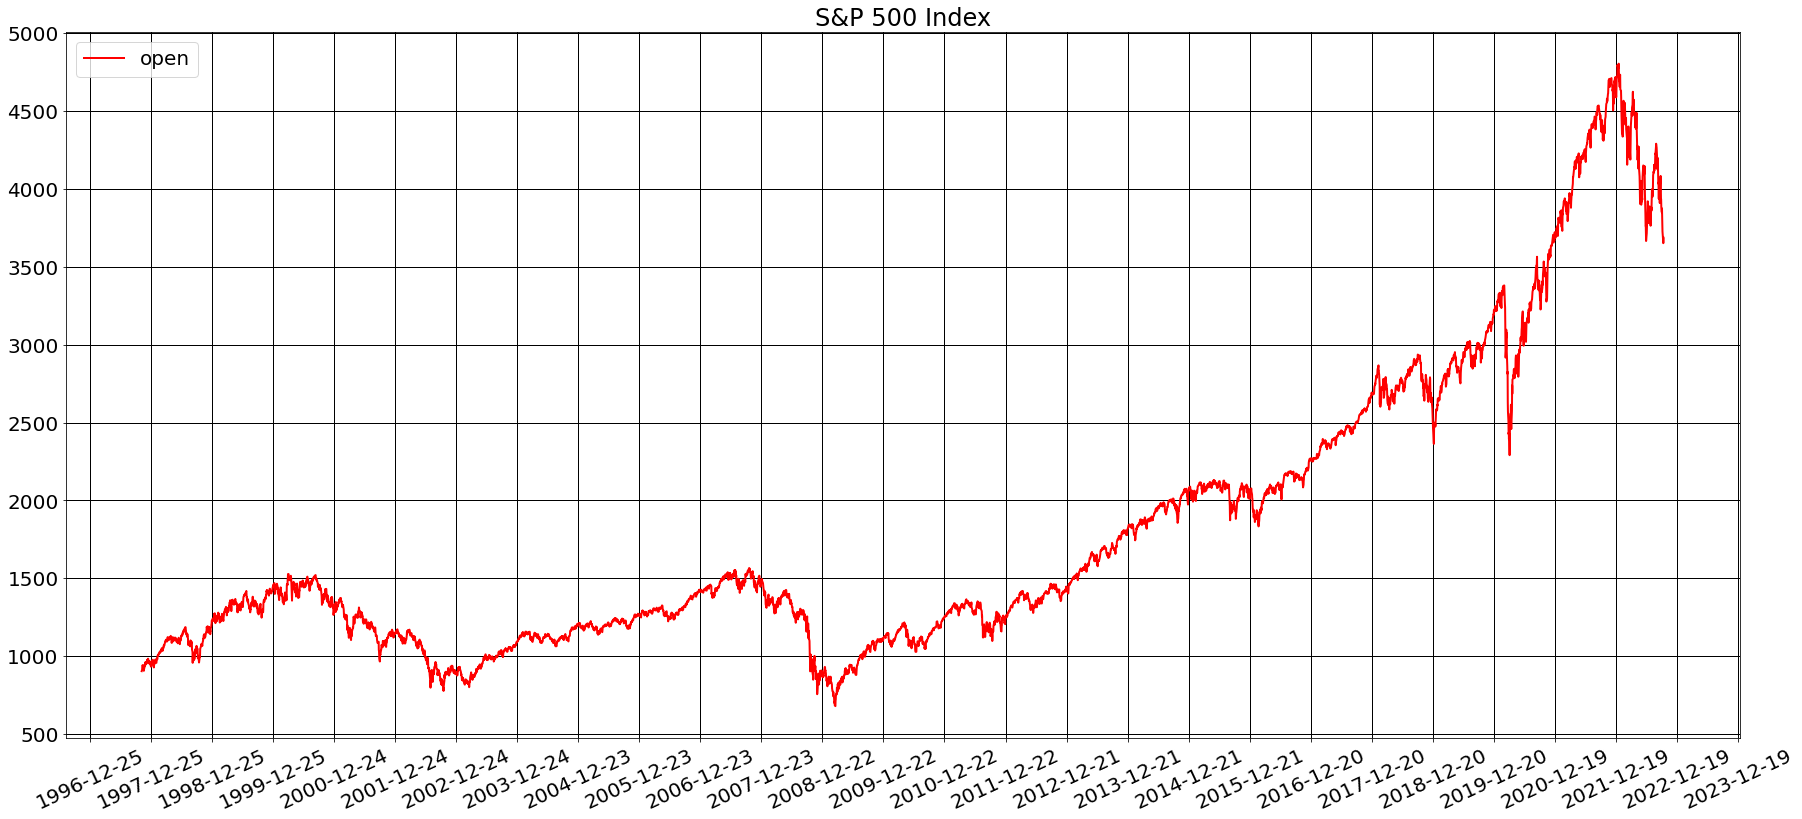

In [4]:
plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()

ax.plot(data['date'], data['open'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

In [5]:
# Найдем минимальное значение между концом 2008 и концом 2009 года
min_open = min(data[data['date'] > '2008-12-22'][data['date'] < '2009-12-22']['open'])
min_open_date = data[data['open'] == min_open]['date']
data_actual = pd.DataFrame(data[data['date'] > min_open_date.values[0]])
data_actual

<ipython-input-5-cf0488fa2932>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_open = min(data[data['date'] > '2008-12-22'][data['date'] < '2009-12-22']['open'])


,date,open,high,low,close,adj_close,volume
0,2022-09-29,3687.01,3687.01,3610.40,3640.47,3640.47,4681810000
1,2022-09-28,3651.94,3736.74,3640.61,3719.04,3719.04,4684850000
2,2022-09-27,3686.44,3717.53,3623.29,3647.29,3647.29,4577740000
3,2022-09-26,3682.72,3715.67,3644.76,3655.04,3655.04,4886140000
4,2022-09-23,3727.14,3727.14,3647.47,3693.23,3693.23,5144270000
...,...,...,...,...,...,...,...
3409,2009-03-17,753.88,778.12,749.93,778.12,778.12,6156800000
3410,2009-03-16,758.84,774.53,753.37,753.89,753.89,7883540000
3411,2009-03-13,751.97,758.29,742.46,756.55,756.55,6787090000
3412,2009-03-12,720.89,752.63,714.76,750.74,750.74,7326630000


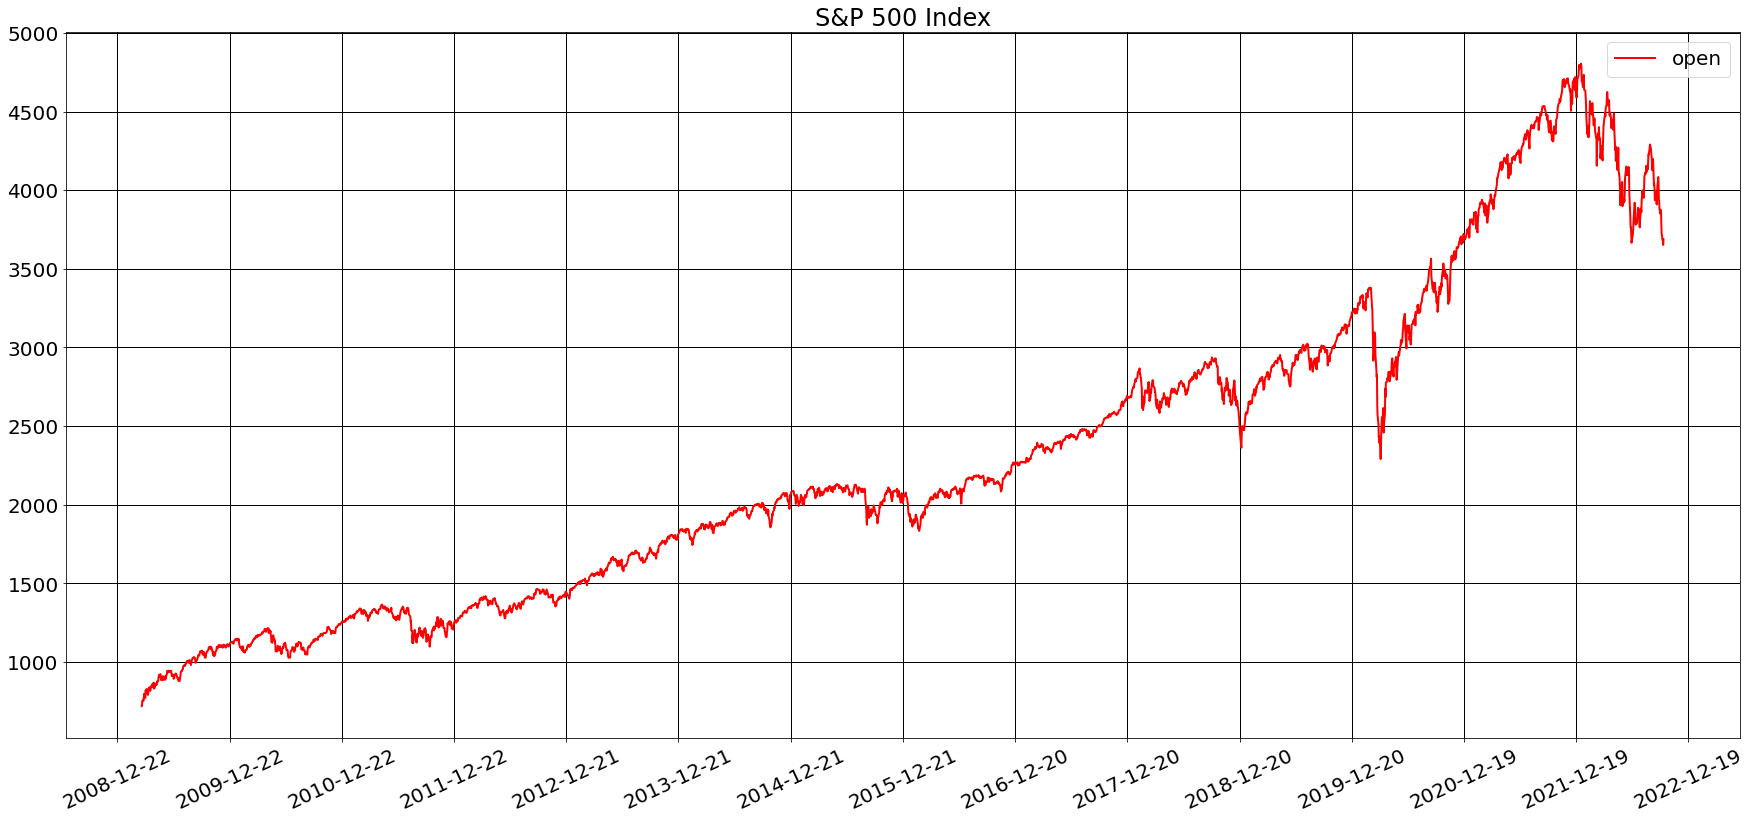

In [6]:
plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()

ax.plot(data_actual['date'], data_actual['open'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

In [7]:
# Данных о некоторых днях нет, т.к. это выходные дни, когда биржа не работает.  
city_data = {
    'date':pd.date_range(start = "20090311", end = "20220929", freq = "D"),
}
all_data = pd.DataFrame(city_data)
all_data = all_data.merge(data_actual, on='date', how='left')
all_data[all_data.isnull().any(1)]

,date,open,high,low,close,adj_close,volume
3,2009-03-14,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-03-15,NaN,NaN,NaN,NaN,NaN,NaN
10,2009-03-21,NaN,NaN,NaN,NaN,NaN,NaN
11,2009-03-22,NaN,NaN,NaN,NaN,NaN,NaN
17,2009-03-28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4932,2022-09-11,NaN,NaN,NaN,NaN,NaN,NaN
4938,2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN
4939,2022-09-18,NaN,NaN,NaN,NaN,NaN,NaN
4945,2022-09-24,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Добавим значения в начале и удалим значения в конце, чтобы все недели временного ряды были полными.
data_actual = data[data['date'] >= '2009-03-09'][data['date'] <= '2022-09-23']
print(data_actual.head(), data_actual.tail())

        date     open     high      low    close  adj_close      volume
4 2022-09-23  3727.14  3727.14  3647.47  3693.23    3693.23  5144270000
5 2022-09-22  3782.36  3790.90  3749.45  3757.99    3757.99  4284600000
6 2022-09-21  3871.40  3907.07  3789.49  3789.93    3789.93  4078330000
7 2022-09-20  3875.23  3876.01  3827.54  3855.93    3855.93  4058050000
8 2022-09-19  3849.91  3900.45  3838.50  3899.89    3899.89  3766850000            date    open    high     low   close  adj_close      volume
3411 2009-03-13  751.97  758.29  742.46  756.55     756.55  6787090000
3412 2009-03-12  720.89  752.63  714.76  750.74     750.74  7326630000
3413 2009-03-11  719.59  731.92  713.85  721.36     721.36  7287810000
3414 2009-03-10  679.28  719.60  679.28  719.60     719.60  8618330000
3415 2009-03-09  680.76  695.27  672.88  676.53     676.53  7277320000


<ipython-input-8-e39b37f8751d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_actual = data[data['date'] >= '2009-03-09'][data['date'] <= '2022-09-23']


In [9]:
# выравниваем индексацию
data_actual = data_actual.reset_index()
del data_actual['index']
data_actual

,date,open,high,low,close,adj_close,volume
0,2022-09-23,3727.14,3727.14,3647.47,3693.23,3693.23,5144270000
1,2022-09-22,3782.36,3790.90,3749.45,3757.99,3757.99,4284600000
2,2022-09-21,3871.40,3907.07,3789.49,3789.93,3789.93,4078330000
3,2022-09-20,3875.23,3876.01,3827.54,3855.93,3855.93,4058050000
4,2022-09-19,3849.91,3900.45,3838.50,3899.89,3899.89,3766850000
...,...,...,...,...,...,...,...
3407,2009-03-13,751.97,758.29,742.46,756.55,756.55,6787090000
3408,2009-03-12,720.89,752.63,714.76,750.74,750.74,7326630000
3409,2009-03-11,719.59,731.92,713.85,721.36,721.36,7287810000
3410,2009-03-10,679.28,719.60,679.28,719.60,719.60,8618330000


### Дифференцирование по дням

In [10]:
diff_days = np.array([])
count = 0
for i in range(len(data_actual) - 1):
    diff = data_actual['open'][i + 1] - data_actual['open'][i]
    diff_days = np.append(diff_days, diff)
diff_days = np.append(diff_days, np.nan)

In [11]:
diff_days = pd.DataFrame({'difference': diff_days})
diff_days['date'] = data_actual['date']
diff_days

,difference,date
0,55.22,2022-09-23
1,89.04,2022-09-22
2,3.83,2022-09-21
3,-25.32,2022-09-20
4,31.04,2022-09-19
...,...,...
3407,-31.08,2009-03-13
3408,-1.30,2009-03-12
3409,-40.31,2009-03-11
3410,1.48,2009-03-10


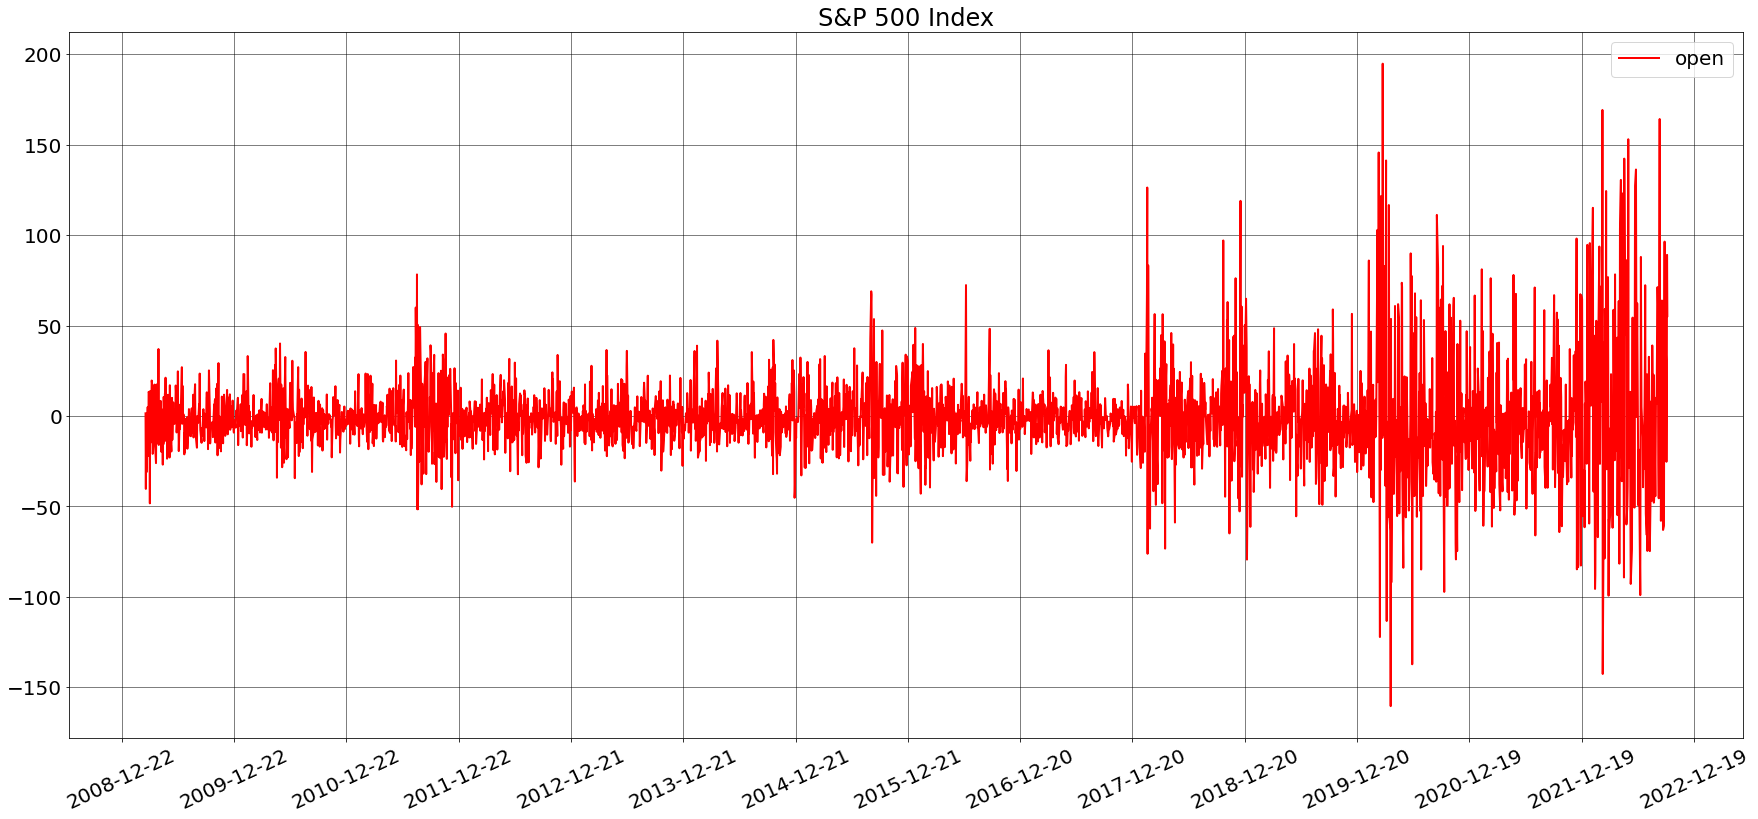

In [12]:
plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()

ax.plot(diff_days['date'], diff_days['difference'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 0.5,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

Далее будет строится модель машинного обучения для предсказания дифференцированных данных.

### Дифференцирование по дням года

In [13]:
def count_days(year1, year2):
    return len(data_actual[data_actual['date'] >= str(year1) + '-03-09'][data_actual['date'] <= str(year2) + '-03-09'])


year1 = 2009
year2 = 2022
for i in range(year1, year2):
    print(i, i + 1, count_days(i, i + 1))

2009 2010 253
2010 2011 254
2011 2012 254
2012 2013 250
2013 2014 251
2014 2015 252
2015 2016 254
2016 2017 253
2017 2018 253
2018 2019 251
2019 2020 252
2020 2021 253
2021 2022 254


<ipython-input-13-81c58da5bbd9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data_actual[data_actual['date'] >= str(year1) + '-03-09'][data_actual['date'] <= str(year2) + '-03-09'])


In [14]:
# Можно заметить, что количество дней не совпадает, поэтому необходимо уровнять.
# data'abcd' - означает промежуток, т.е. от года ab до года cd

data0910 = data_actual[data_actual['date'] >= '2009-03-09'][data_actual['date'] <= '2010-03-09']
data1011 = data_actual[data_actual['date'] >= '2010-03-09'][data_actual['date'] <= '2011-03-08']
data1112 = data_actual[data_actual['date'] >= '2011-03-09'][data_actual['date'] <= '2012-03-08']
data1213 = data_actual[data_actual['date'] >= '2012-03-09'][data_actual['date'] <= '2013-03-13']
data1314 = data_actual[data_actual['date'] >= '2013-03-09'][data_actual['date'] <= '2014-03-11']
data1415 = data_actual[data_actual['date'] >= '2014-03-09'][data_actual['date'] <= '2015-03-10']
data1516 = data_actual[data_actual['date'] >= '2015-03-09'][data_actual['date'] <= '2016-03-08']
data1617 = data_actual[data_actual['date'] >= '2016-03-09'][data_actual['date'] <= '2017-03-09']
data1718 = data_actual[data_actual['date'] >= '2017-03-09'][data_actual['date'] <= '2018-03-09']
data1819 = data_actual[data_actual['date'] >= '2018-03-09'][data_actual['date'] <= '2019-03-12']
data1920 = data_actual[data_actual['date'] >= '2019-03-09'][data_actual['date'] <= '2020-03-10']
data2021 = data_actual[data_actual['date'] >= '2020-03-09'][data_actual['date'] <= '2021-03-09']
data2122 = data_actual[data_actual['date'] >= '2021-03-09'][data_actual['date'] <= '2022-03-08']


# Можно заметить, что количество дней не совпадает, поэтому необходимо уровнять.
# data'abcd' - означает промежуток, т.е. от года ab до года cd
dict_years = {
    'open0910' : data0910['open'].values,
    'open1011' : data1011['open'].values,
    'open1112' : data1112['open'].values,
    'open1213' : data1213['open'].values,
    'open1314' : data1314['open'].values,
    'open1415' : data1415['open'].values,
    'open1516' : data1516['open'].values,
    'open1617' : data1617['open'].values,
    'open1718' : data1718['open'].values,
    'open1819' : data1819['open'].values,
    'open1920' : data1920['open'].values,
    'open2021' : data2021['open'].values,
    'open2122' : data2122['open'].values
}

data_years_open = pd.DataFrame(dict_years)
data_years_open

<ipython-input-14-eea72c484492>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1011 = data_actual[data_actual['date'] >= '2010-03-09'][data_actual['date'] <= '2011-03-08']
<ipython-input-14-eea72c484492>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1112 = data_actual[data_actual['date'] >= '2011-03-09'][data_actual['date'] <= '2012-03-08']
<ipython-input-14-eea72c484492>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1213 = data_actual[data_actual['date'] >= '2012-03-09'][data_actual['date'] <= '2013-03-13']
<ipython-input-14-eea72c484492>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1314 = data_actual[data_actual['date'] >= '2013-03-09'][data_actual['date'] <= '2014-03-11']
<ipython-input-14-eea72c484492>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1415 = data_actual[data_actual['date'] >= '

,open0910,open1011,open1112,open1213,open1314,open1415,open1516,open1617,open1718,open1819,open1920,open2021,open2122
0,1137.56,1311.05,1352.65,1552.48,1878.26,2076.14,1996.88,2363.49,2752.91,2787.34,2813.48,3851.93,4202.66
1,1138.40,1322.72,1343.39,1556.22,1877.86,2072.25,1996.11,2369.81,2732.75,2747.61,2863.89,3844.39,4327.01
2,1125.12,1330.73,1363.63,1551.15,1878.52,2100.91,1994.01,2370.74,2710.18,2730.79,2954.20,3793.58,4342.12
3,1119.12,1312.37,1369.59,1544.26,1874.18,2098.54,1985.60,2375.23,2730.18,2766.53,3075.70,3818.53,4401.31
4,1119.36,1305.47,1374.09,1541.46,1874.05,2107.72,1976.60,2380.92,2681.06,2790.27,3045.75,3863.99,4322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,751.97,1148.53,1288.46,1394.17,1563.21,1845.07,2064.56,2015.27,2370.34,2754.27,2810.79,2569.99,3942.96
249,720.89,1151.71,1301.19,1395.95,1554.52,1869.06,2041.10,2019.27,2368.55,2774.06,2810.38,2630.86,3924.52
250,719.59,1143.96,1293.43,1371.92,1552.48,1866.15,2044.69,1994.71,2371.56,2792.31,2799.78,2825.60,3915.54
251,679.28,1140.22,1315.72,1370.78,1556.22,1878.26,2076.14,1990.97,2372.52,2790.54,2787.34,2813.48,3891.99


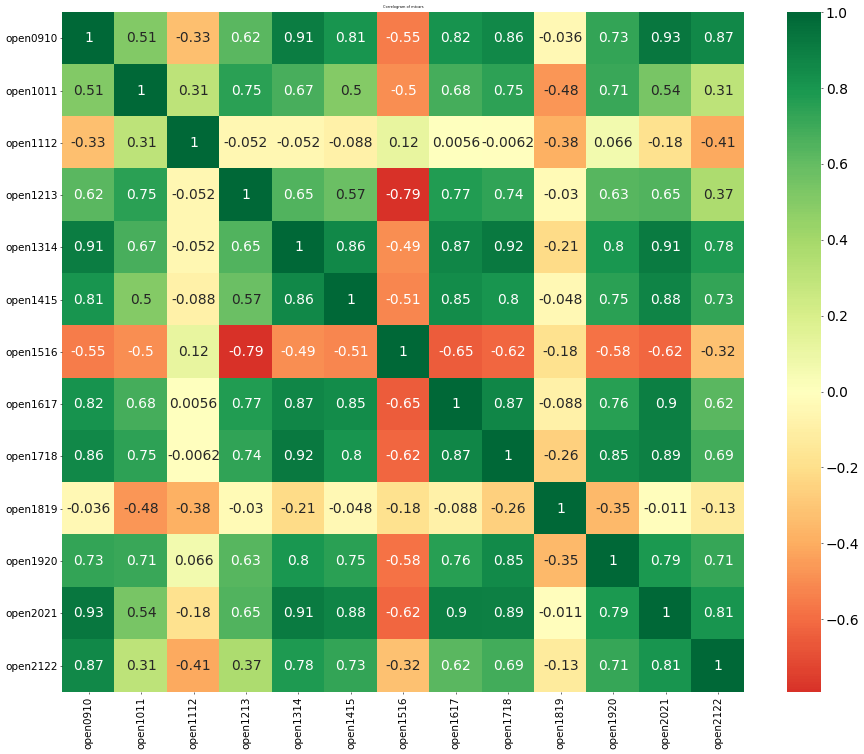

In [15]:
plt.figure(figsize=(22,18), dpi= 50)
sns.heatmap(data_years_open.corr(), xticklabels=data_years_open.corr().columns, yticklabels=data_years_open.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
diff_data_years_open = pd.DataFrame()
cnct = pd.DataFrame()
for i in range(len(data_years_open.columns) - 1):
    a = data_years_open.columns[i]
    b = data_years_open.columns[i + 1]
    s = str('diff ' + a + '-' + b)
    diff_data_years_open[s] = data_years_open[data_years_open.columns[i]] - data_years_open[data_years_open.columns[i + 1]]
    cnct = pd.concat([cnct, diff_data_years_open[s]])
    
    
# выравниваем индексацию
cnct = cnct.reset_index()
del cnct['index']
cnct

,0
0,-173.49
1,-184.32
2,-205.61
3,-193.25
4,-186.11
...,...
3031,-1372.97
3032,-1293.66
3033,-1089.94
3034,-1078.51


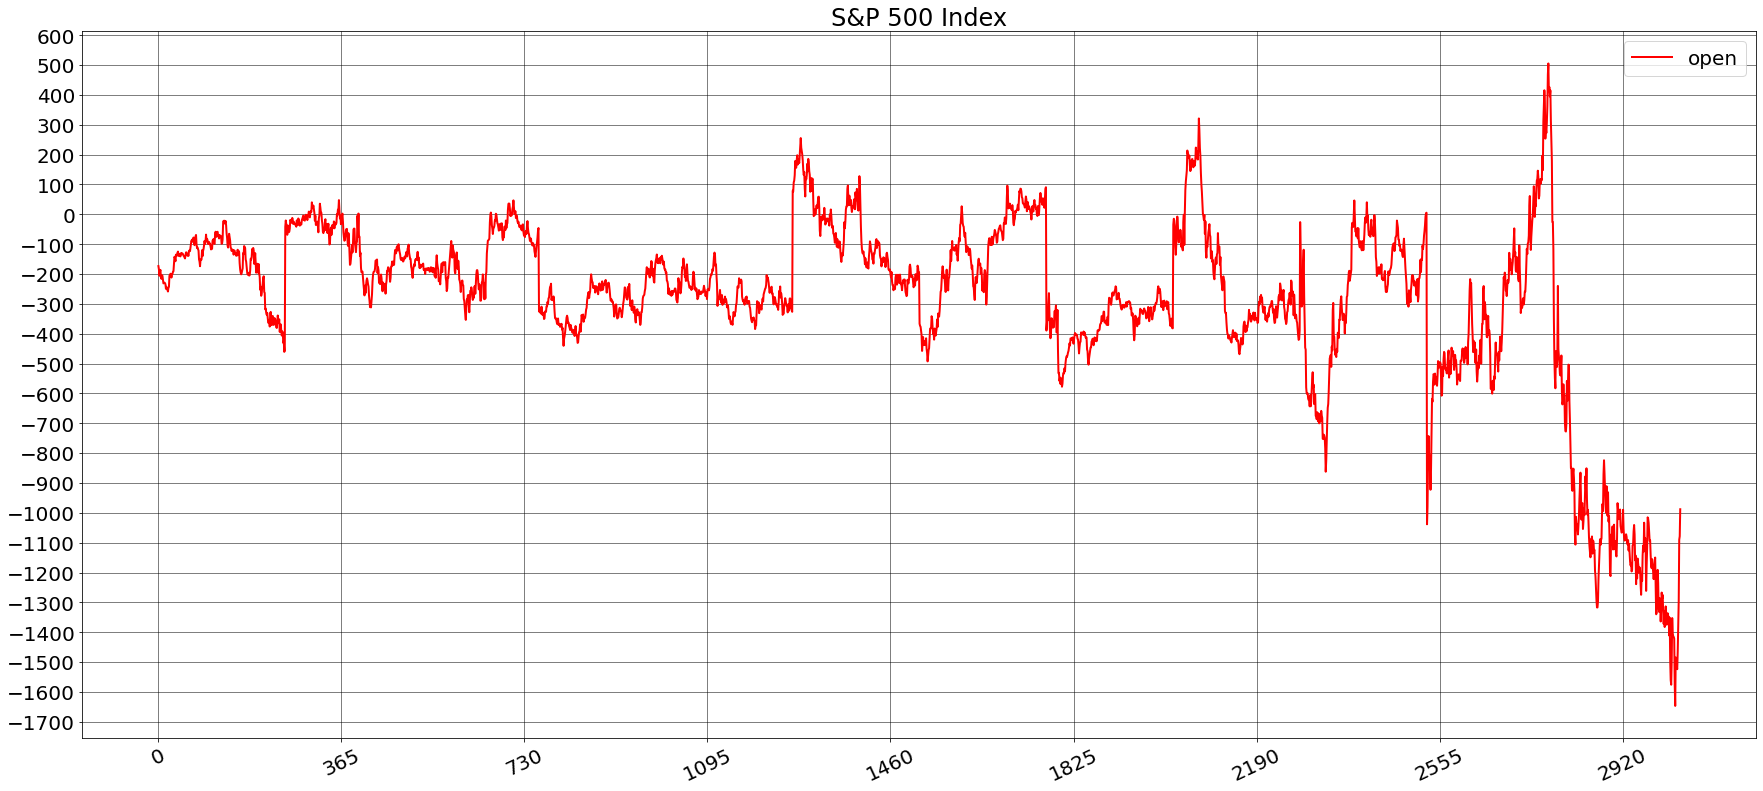

In [17]:
plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()

ax.plot(cnct, 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 0.5,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

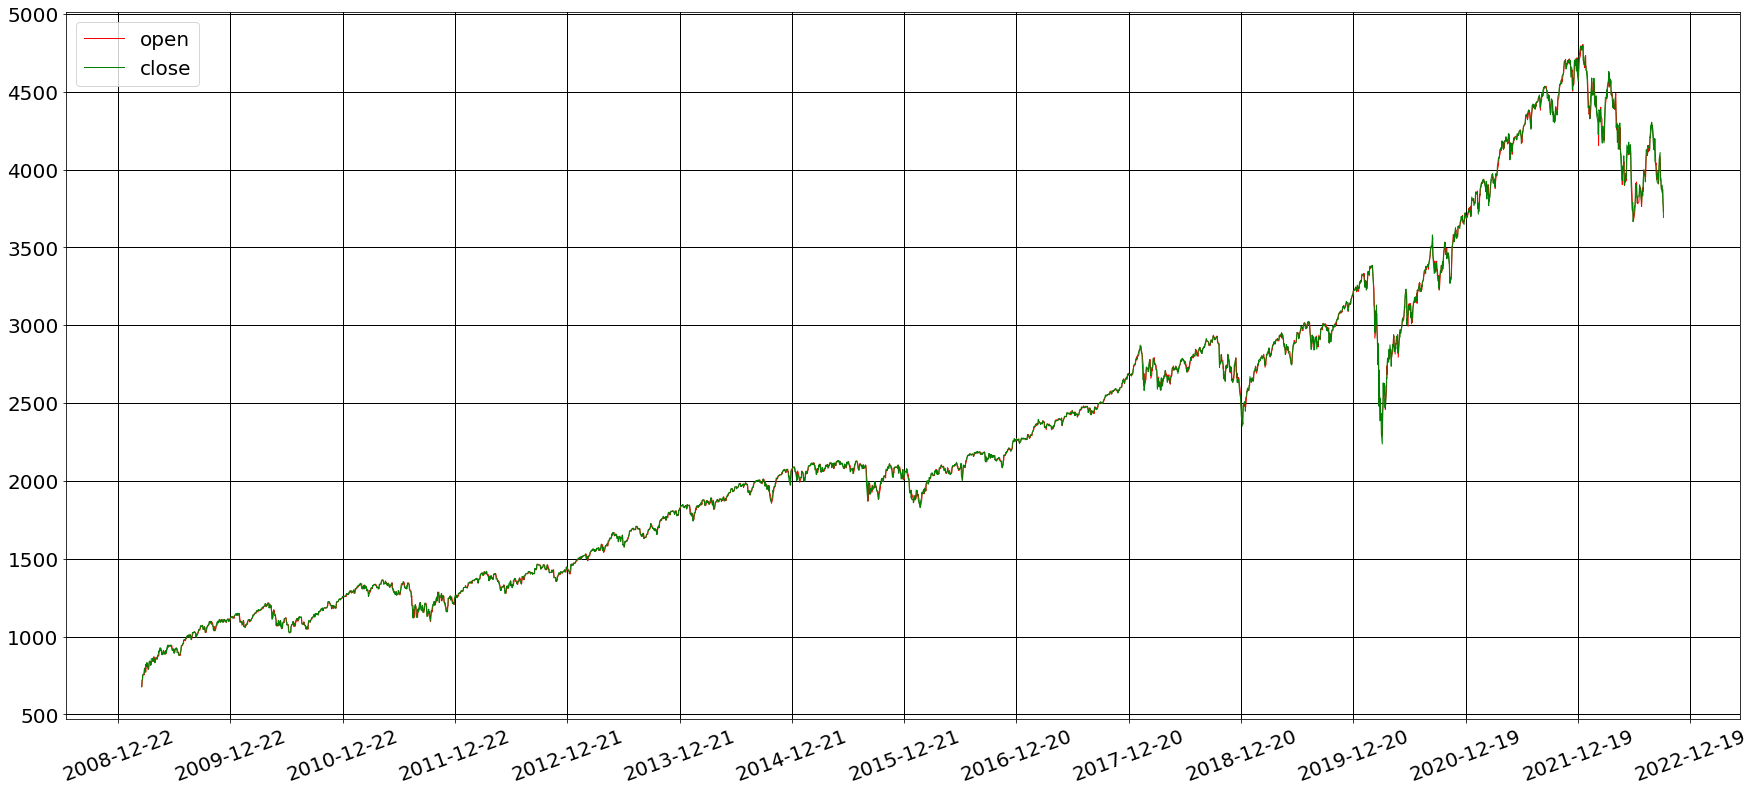

In [18]:
plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()


ax.plot(data_actual['date'], data_actual['open'], 'r', linewidth=1, label='open')
ax.plot(data_actual['date'], data_actual['close'], 'g', linewidth=1, label='close')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY

fig.set_figwidth(30)
fig.set_figheight(13)
plt.xticks(rotation=20)

ax.legend()
plt.show()